In [7]:
def cleanChangeVal(val):
    if isinstance(val,str):
        return float(val.replace('%',''))
    else:
        return val

In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling as pp
from datetime import date
import pickle


In [77]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

In [78]:

df = pd.read_csv('datasets/CrudeoilvsDiesel.csv',parse_dates=['Month'],dayfirst=True)
df.head()
df.columns = ['Month','Crude_Oil_Price','Diesel_Price']

In [79]:
df.Month = df.Month.apply(lambda d:d.toordinal())
df.Crude_Oil_Price = df.Crude_Oil_Price.apply(lambda val:float(val.replace(',','')))

In [80]:
df.head()

,Month,Crude_Oil_Price,Diesel_Price
0,732317,3145.13,96.30
1,732318,3365.75,102.99
2,732319,3341.97,104.57
3,732320,2865.03,83.48
4,732321,2633.08,81.57


<AxesSubplot:xlabel='Month', ylabel='Crude_Oil_Price'>

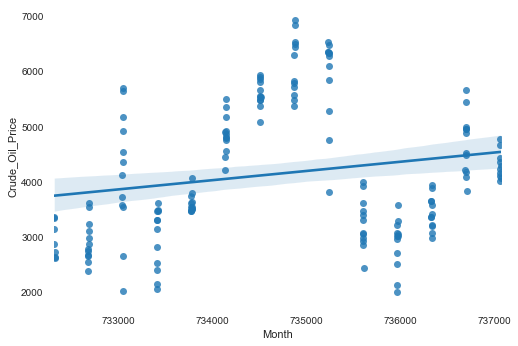

In [81]:
sns.regplot(x='Month',y='Crude_Oil_Price',data=df)

In [82]:
X = df[['Month','Crude_Oil_Price']]
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = df['Diesel_Price']
trainX,testX,trainY,testY = train_test_split(X,y,test_size=.2)

In [83]:
model = RandomForestRegressor()
model.fit(trainX, trainY)
model.score(testX,testY) * 100

97.71410914015905

In [84]:
prediction = {'scale':scaler,'model':model,'info':'pass month as ordinal and crude oil price and it will predict diesel price','accuracy':96.76}

In [85]:
with open('models/crude_oil_vs_diesel_prediction_model.pk','wb') as  f:
    pickle.dump(prediction, f)

CrudeoilvsGasoline.csv

In [86]:
df = pd.read_csv('datasets/CrudeoilvsGasoline.csv',parse_dates=['Month'],dayfirst=True)

In [87]:
df.columns = ['Month','Crude_Oil_Price','Gasoline_Price']

In [88]:
df.Month = df.Month.apply(lambda d:d.toordinal())
df.Crude_Oil_Price = df.Crude_Oil_Price.apply(lambda val:float(val.replace(',','')))
df.head()

,Month,Crude_Oil_Price,Gasoline_Price
0,731952,2348.85,65.77
1,731953,2454.20,69.27
2,731954,2700.01,84.50
3,731955,2709.21,93.67
4,731956,2608.22,76.60


In [89]:
X = df[['Month','Crude_Oil_Price']]
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = df['Gasoline_Price']
trainX,testX,trainY,testY = train_test_split(X,y,test_size=.2)
model = RandomForestRegressor()
model.fit(trainX, trainY)
model.score(testX,testY) * 100

96.74761232772866

In [90]:
prediction = {'scale':scaler,'model':model,'info':'pass month as ordinal and crude oil price and it will predict gasoline price','accuracy':97.05}

In [91]:
with open('models/crude_oil_vs_gasoline_prediction_model.pk','wb') as  f:
    pickle.dump(prediction, f)

datasets/Diesel(new).csv

In [141]:
df = pd.read_csv('datasets/Diesel(new).csv',parse_dates=['Date'],dayfirst=True)

In [142]:
df.head()
df.Cities.nunique()

4

In [143]:
df.Date = df.Date.apply(lambda d:d.toordinal())

In [144]:
cityEnc = OneHotEncoder()
cityDummies = cityEnc.fit_transform(df[['Cities']]).toarray()

In [145]:
df.drop(['Cities'],axis=1,inplace=True)
df.head()

,Date,Diesel (Rs./Litre)
0,737621,81.18
1,737620,81.05
2,737619,81.05
3,737766,80.94
4,737736,80.78


In [158]:
data = np.append(cityDummies[:,:-1],df[['Date']],axis=1)

In [159]:
y = df['Diesel (Rs./Litre)']

In [163]:
scaler = StandardScaler()
X = scaler.fit_transform(data)
trainX,testX,trainY,testY = train_test_split(X,y,test_size=.2)
model = RandomForestRegressor()
model.fit(trainX, trainY)
model.score(testX,testY) * 100

92.67092369388611

In [164]:
prediction = {'city_encoder':cityEnc,'scale':scaler,'model':model,'info':'pass date and city name and get price predictin of diesel ','accuracy':90.05}
with open('models/diesel_price_prediction.pk','wb') as  f:
    pickle.dump(prediction, f)

datasets/Petrol(new).csv

In [169]:
df = pd.read_csv('datasets/Petrol(new).csv',parse_dates=['Date'],dayfirst=True)

In [170]:
df.head()

,Date,Cities,Petrol
0,2020-07-15,Delhi,80.43
1,2020-07-14,Delhi,80.43
2,2020-07-13,Delhi,80.43
3,2020-12-07,Delhi,80.43
4,2020-11-07,Delhi,80.43


In [171]:
df.Cities.nunique()

4

In [172]:
df.Date = df.Date.apply(lambda d:d.toordinal())

In [173]:
cityEnc = OneHotEncoder()
cityDummies = cityEnc.fit_transform(df[['Cities']]).toarray()
df.drop(['Cities'],axis=1,inplace=True)
df.head()

,Date,Petrol
0,737621,80.43
1,737620,80.43
2,737619,80.43
3,737766,80.43
4,737736,80.43


In [174]:
data = np.append(cityDummies[:,:-1],df[['Date']],axis=1)

In [175]:
y=df['Petrol']

In [176]:
scaler = StandardScaler()
X = scaler.fit_transform(data)
trainX,testX,trainY,testY = train_test_split(X,y,test_size=.2)
model = RandomForestRegressor()
model.fit(trainX, trainY)
model.score(testX,testY) * 100

83.09836794038947

In [177]:
prediction = {'city_encoder':cityEnc,'scale':scaler,'model':model,'info':'pass date and city name and get price predictin of petrol ','accuracy':90.05}
with open('models/petrol_price_prediction.pk','wb') as  f:
    pickle.dump(prediction, f)